In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

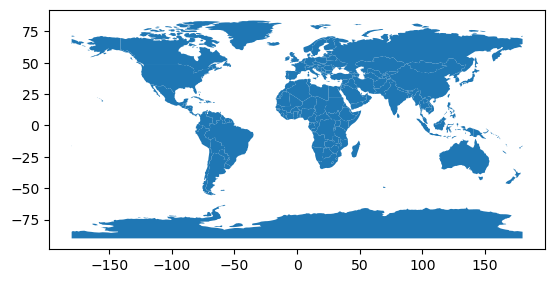

In [3]:
#world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

world.plot()
plt.show()

In [4]:
m = folium.Map(location = [0,0], zoom_start=2)
m 


In [6]:
def create_map(location, zoom_start=10):
    map_object = folium.Map(location=location, zoom_start=zoom_start)
    return map_object

usa_map = create_map(location=[37.0902,-95.7129], zoom_start=4)
usa_map

In [7]:
boulder_map = create_map(location=[40.015,-105.27], zoom_start=12)
boulder_map

In [8]:
usa_map.save('usa_map.html')
boulder_map.save('boulder.map.html')

In [5]:
from geopy.distance import geodesic

In [2]:
data = {
    'City': ['Denver','Austin'],
    'Latitude': [39.7392, 30.2672],
    'Longitude': [-104.9903,-97.7431]
}

In [6]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'],data['Latitude']))
coords_denver = (gdf.loc[0,'Latitude'],gdf.loc[0,'Longitude'])
coords_austin = (gdf.loc[1,'Latitude'],gdf.loc[1,'Longitude'])

distance = geodesic(coords_denver, coords_austin).kilometers
print(f"distance: {distance}")

distance: 1240.6682902470661


In [12]:
lat = gdf['Latitude'].mean()
lon = gdf['Longitude'].mean()

In [16]:
midpoint = [lat,lon]
m = folium.Map(location=midpoint, zoom_start=4)

for idx, row in gdf.iterrows():
    folium.Marker(
        location = [row['Latitude'],row['Longitude']],popuu=row['City']
    ).add_to(m)

line = folium.PolyLine(locations=[coords_denver, coords_austin],
                        color='blue',
                        weight=2.5,
                        opacity=1)

m.add_child(line)
m

In [ ]:
import folium as fl
from streamlit_folium import st_folium
import streamlit as st

In [ ]:

def get_pos(lat,lng):
    return lat,lng

m = fl.Map()

m.add_child(fl.LatLngPopup())

map = st_folium(m, height=350, width=700)


data = get_pos(map['last_clicked']['lat'],map['last_clicked']['lng'])

if data is not None:
    st.write(data)

m

2024-11-13 17:42:01.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 17:42:01.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 17:42:01.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 17:42:01.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


TypeError: 'NoneType' object is not subscriptable

In [10]:
m = folium.Map()
m.add_child(folium.LatLngPopup())
st_folium(m)
m

2024-11-13 17:58:14.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 17:58:14.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 17:58:14.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 17:58:14.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [16]:
import folium

map_4 = folium.Map(location=[46.8527, -121.7649],
                   zoom_start=13)
folium.Marker(location=[46.8354, -121.7325], popup='Camp Muir').add_to(map_4)
map_4.click_for_marker(popup='Waypoint')
#map_4.create_map(path='mtrainier.html')
m

AttributeError: 'Map' object has no attribute 'click_for_marker'

In [18]:
map_3 = folium.Map(location=[46.1991, -122.1889],
                   zoom_start=13)
folium.LatLngPopup().add_to(map_3)
map_3

In [20]:
from geopy.geocoders import Nominatim

In [27]:
geolocator = Nominatim(user_agent="geo_coder")
address = "1600 Pennsylvania Avenue NW, Washington, DC 20500, USA"

try:
    location = geolocator.geocode(address)
    if location:
        print(f'Address: {address}')
        print(f'Latitude: {location.latitude}, Longitude: {location.longitude}')
except Exception as e:
    print(f'Error: {e}')

Address: 1600 Pennsylvania Avenue NW, Washington, DC 20500, USA
Latitude: 38.897699700000004, Longitude: -77.03655315


In [26]:
location = geolocator.geocode(address)
print(location)

print(f'Address: {address}')
print(f'Latitude: {location.latitude}, Longitude: {location.longitude}')

None
Address: 6609 Morrison Dr, Denver, CO 80221, USA


AttributeError: 'NoneType' object has no attribute 'latitude'

In [29]:
from ipyleaflet import Map, Marker, CircleMarker, basemaps, LayersControl


In [30]:
from geopy.geocoders import Nominatim
from geopy.distance import great_circle

In [1]:
def geocode_city(city_name):
    geolocator = Nominatim(user_agent="geo_analysis")
    location = geolocator.geocode(city_name)
    return(location.latitude, location.longitude)

def cal_distance(point1, point2):
    return great_circle(point1, point2).kilometers



In [ ]:
if __name__ == "__main__":
    city_name = input("enter city name to find nearby big cities:")
    city_coords = geocode_city(city_name)
    print(f"Coordiantes of {city_name}: {city_coords}")
    big_cities = {
        "New York": (40.7128, -74.0060),
        "Los Angeles": (38.0522, -118.2437),
        "Chicago": (41.8781, -87.6298)
    }


nearby_cities = {}
for city, coords in big_cities.times():
    distance = cal_distance(city_coords, coords)
    if distance <= 500:
        nearby_cities[city] = coords

m = Map(center=(city_coords[0], city_coords[1]), zoom=8, basemaps= basemaps.OpenStreetMap.Mapnik)
input_city_marker = Marker(location=(city_coords[0],city_coords[1]), title=city_name)
m.add_layer(input_city_marker)
for city, coords in nearby_cities.items():
    marker = CircleMarker(location=(city_coords[0],city_coords[1]),radius=7, color = "blue", fill_color = "blue", fill_opacity=0.6)
    m.add_layer(marker)
m.add_control(LayersControl())
display(m)

US Population Density Project Below

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
import branca.colormap as cm
#from google.colab import files

In [8]:
pop_data = pd.read_csv('usa_population_2019.csv')
pop_data.head(10)

,Geographic Area,Postal Code,Total Resident Population
0,United States,NaN,328239523
1,Northeast,NaN,55982803
2,Midwest,NaN,68329004
3,South,NaN,125580448
4,West,NaN,78347268
5,Alabama,AL,4903185
6,Alaska,AK,731545
7,Arizona,AZ,7278717
8,Arkansas,AR,3017804
9,California,CA,39512223


In [9]:
gdf = gpd.read_file('us-states.json')

In [11]:
merged_data = gdf.merge(pop_data, left_on="name", right_on="Geographic Area")
merged_data.head(10)


,id,name,geometry,Geographic Area,Postal Code,Total Resident Population
0,AL,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984...",Alabama,AL,4903185
1,AK,Alaska,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",Alaska,AK,731545
2,AZ,Arizona,"POLYGON ((-109.04250 37.00026, -109.04798 31.3...",Arizona,AZ,7278717
3,AR,Arkansas,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",Arkansas,AR,3017804
4,CA,California,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",California,CA,39512223
5,CO,Colorado,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",Colorado,CO,5758736
6,CT,Connecticut,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",Connecticut,CT,3565287
7,DE,Delaware,"POLYGON ((-75.41409 39.80446, -75.50720 39.683...",Delaware,DE,973764
8,FL,Florida,"POLYGON ((-85.49714 30.99754, -85.00421 31.003...",Florida,FL,21477737
9,GA,Georgia,"POLYGON ((-83.10919 35.00118, -83.32279 34.787...",Georgia,GA,10617423


In [25]:
merged_data["area_km2"] = merged_data["geometry"].to_crs(epsg=3395).area /10**6
merged_data["population_density"] = merged_data["Total Resident Population"]/merged_data["area_km2"]
print(merged_data[['name','Total Resident Population','area_km2','population_density']])

              name  Total Resident Population      area_km2  \
0          Alabama                    4903185  1.889812e+05   
1           Alaska                     731545  8.196423e+06   
2          Arizona                    7278717  4.325445e+05   
3         Arkansas                    3017804  2.042087e+05   
4       California                   39512223  6.470826e+05   
5         Colorado                    5758736  4.453843e+05   
6      Connecticut                    3565287  2.298079e+04   
7         Delaware                     973764  8.403159e+03   
8          Florida                   21477737  1.940085e+05   
9          Georgia                   10617423  2.148018e+05   
10          Hawaii                    1415872  1.664017e+04   
11           Idaho                    1787065  4.229594e+05   
12        Illinois                   12671821  2.490899e+05   
13         Indiana                    6732219  1.586047e+05   
14            Iowa                    3155070  2.640713

In [ ]:
min_density = merged_data['population_density'].min()
max_density = merged_data['population_density'].max()

colormap = cm.linear.YlOrRd_09.scale(min_density, max_density)

In [39]:
def style_func(feature):
    density = feature['properties']['population_density']
    return {
        'fillColor': colormap(density),
        'color':'black',
        'weight':1,
        'fillOpacity': 0.6,
    }

m = folium.Map(location=[37.8,-96], zoom_start=4)
folium.GeoJson(
    merged_data,
    style_function=style_func,
    tooltip=GeoJsonTooltip(fields=['name','population_density'],
                            aliases=['State:','Population Density:'],
                            localize=True)
).add_to(m)

colormap.caption = "Population Density"
colormap.add_to(m)
m.save('us_popdensity.html')
m 

Heatmap: Air Quality Below

In [58]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime
import pandas as pd
import numpy as np 


In [42]:
data = pd.read_csv("ad_viz_plotval_data.csv")
data.head(10)

,Date,Source,Site ID,POC,Daily Max 8-hour CO Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,AQS Parameter Description,Method Code,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2024,AQS,60370016,2,0.2,ppm,2,Glendora,19,79.0,...,Carbon monoxide,158,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.14435,-117.85036
1,01/02/2024,AQS,60370016,2,0.3,ppm,3,Glendora,24,100.0,...,Carbon monoxide,158,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.14435,-117.85036
2,01/03/2024,AQS,60370016,2,0.3,ppm,3,Glendora,24,100.0,...,Carbon monoxide,158,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.14435,-117.85036
3,01/04/2024,AQS,60370016,2,0.3,ppm,3,Glendora,24,100.0,...,Carbon monoxide,158,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.14435,-117.85036
4,01/05/2024,AQS,60370016,2,0.3,ppm,3,Glendora,17,71.0,...,Carbon monoxide,158,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.14435,-117.85036
5,01/06/2024,AQS,60370016,2,0.3,ppm,3,Glendora,24,100.0,...,Carbon monoxide,158,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.14435,-117.85036
6,01/07/2024,AQS,60370016,2,0.3,ppm,3,Glendora,24,100.0,...,Carbon monoxide,158,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.14435,-117.85036
7,01/08/2024,AQS,60370016,2,0.2,ppm,2,Glendora,24,100.0,...,Carbon monoxide,158,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.14435,-117.85036
8,01/09/2024,AQS,60370016,2,0.3,ppm,3,Glendora,24,100.0,...,Carbon monoxide,158,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.14435,-117.85036
9,01/10/2024,AQS,60370016,2,0.3,ppm,3,Glendora,24,100.0,...,Carbon monoxide,158,31080,"Los Angeles-Long Beach-Anaheim, CA",6,California,37,Los Angeles,34.14435,-117.85036


In [46]:
data["Date"] = pd.to_datetime(data["Date"])
data["Week"] = data["Date"].dt.isocalendar().week 

In [56]:
weekly_mean_aqi = data.groupby(["Local Site Name","Week"]).agg({
    'Site Latitude': 'first',
    'Site Longitude': 'first',
    'Daily AQI Value': lambda x: np.mean(x)
}).reset_index()

print('Weekly Mean AQI Value per Location:')
for location in weekly_mean_aqi["Local Site Name"].unique():
    location_data = weekly_mean_aqi[weekly_mean_aqi['Local Site Name'] == location]
    print(f'Location:{location}')
    for index, row in location_data.iterrows():
        print(f'Week: {row["Week"]}, Average AQI Wale: {row["Daily AQI Value"]:.2f}')
    print('\n')


Weekly Mean AQI Value per Location:
Location:Compton
Week: 1, Average AQI Wale: 12.71
Week: 2, Average AQI Wale: 15.43
Week: 3, Average AQI Wale: 12.43
Week: 4, Average AQI Wale: 10.86
Week: 5, Average AQI Wale: 12.00
Week: 6, Average AQI Wale: 7.57
Week: 7, Average AQI Wale: 9.86
Week: 8, Average AQI Wale: 6.14
Week: 9, Average AQI Wale: 5.86
Week: 10, Average AQI Wale: 10.71
Week: 11, Average AQI Wale: 6.57
Week: 12, Average AQI Wale: 5.14
Week: 13, Average AQI Wale: 5.14
Week: 14, Average AQI Wale: 8.00
Week: 15, Average AQI Wale: 6.29
Week: 16, Average AQI Wale: 5.29
Week: 17, Average AQI Wale: 2.43
Week: 18, Average AQI Wale: 2.43
Week: 19, Average AQI Wale: 2.57
Week: 20, Average AQI Wale: 1.29
Week: 21, Average AQI Wale: 1.71
Week: 22, Average AQI Wale: 1.57
Week: 23, Average AQI Wale: 1.57
Week: 24, Average AQI Wale: 2.29
Week: 25, Average AQI Wale: 2.00
Week: 26, Average AQI Wale: 1.71
Week: 27, Average AQI Wale: 1.43
Week: 28, Average AQI Wale: 2.29
Week: 29, Average AQI Wale

In [67]:


df_week_list = []

for week in range(1,10):
    weekly_data = weekly_mean_aqi[weekly_mean_aqi["Week"]==week][["Site Latitude", "Site Longitude","Daily AQI Value"]]
    df_week_list.append(weekly_data.values.tolist())

basemap = folium.Map(location=[34.0549,-118.24], zoom_start=11)
HeatMapWithTime(df_week_list, radius=70, gradient={0.05:'blue',0.5:'green',0.75:'yellow',1.0:'red'},
                min_opacity=0.5,
                max_opacity=0.8,
                use_local_extrema=True).add_to(basemap)

# Add the title
loc = 'Weekly AQI'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 

basemap.get_root().html.add_child(folium.Element(title_html))
basemap.save('weekly_aqi_heatmap.html')

basemap



Calculating Risk Flood

In [68]:
import pandas as pd 
import folium
from folium.plugins import HeatMap

In [69]:
data = pd.read_csv('AEGISDataset.csv')

In [70]:
data.head(10)

,lat,lon,flood_heig,elevation,precipitat
0,14.640394,121.055708,0,54.553295,9.0
1,14.698299,121.002132,0,21.856272,10.0
2,14.698858,121.100261,0,69.322807,16.0
3,14.571310,120.983334,0,10.987241,8.0
4,14.762232,121.075735,0,87.889847,18.0
5,14.601178,121.088599,0,14.463734,11.0
6,14.708031,121.052674,0,45.000553,12.0
7,14.709206,121.050292,0,43.226852,13.0
8,14.709625,121.047006,0,43.183113,12.0
9,14.669338,121.132898,0,48.276211,17.0


In [71]:
numeric_columns=['lat','lon','flood_heig','elevation','precipitat']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors = 'coerce')
data_clean = data.dropna()
print("Nan after cleaning:")
print(data_clean.isnull().sum())

Nan after cleaning:
lat           0
lon           0
flood_heig    0
elevation     0
precipitat    0
dtype: int64


In [74]:
data_clean["Normalized_Height"]= (data_clean['flood_heig']-data_clean['flood_heig'].min())/(data_clean['flood_heig'].max() - data_clean['flood_heig'].min())
data_clean['Normalized_Elev'] = (data_clean['elevation']-data_clean['elevation'].min())/(data_clean['elevation'].max() - data_clean['elevation'].min())
data_clean['Normalized_Precip'] = (data_clean['precipitat']-data_clean['precipitat'].min())/(data_clean['precipitat'].max() - data_clean['precipitat'].min())

In [75]:
data_clean['Normalized_Elev'] = 1- data_clean["Normalized_Elev"]


In [77]:
data_clean['Risk_Score'] = (data_clean["Normalized_Height"] * 0.4 + data_clean['Normalized_Elev'] * 0.3 + data_clean['Normalized_Precip'] * 0.3)

In [ ]:
print('\Risk Score for Each LOcation:')
for index, row in data_clean.iterrows():
    print(f'Latitude:{row["lat"]}, Longitude:{row["lon"]}, Risk Score:{row["Risk_Score"]}')

In [81]:
def get_color(risk_score):
    if risk_score < 0.2: 
        return 'green'
    elif 0.2 <= risk_score < 0.4:
        return 'yellow'
    elif 0.4 <= risk_score < 0.6:
        return 'orange'
    elif 0.6 <= risk_score < 0.8:
        return 'red'
    else:
        return 'darkred'

In [87]:
data_clean['color'] = data_clean['Risk_Score'].apply(get_color)

manila_coords = [14.599, 120.98]

manila_map = folium.Map(location=manila_coords, zoom_start=11)
heat_data = data_clean[['lat','lon','Risk_Score']].values.tolist()
HeatMap(heat_data, radius=15, max_zoom=15).add_to(manila_map)
#for index, row, in data_clean.iterrows():
#    print((f'Latitude:{row["lat"]}, Longitude:{row["lon"]}, Risk Score:{row["Risk_Score"]}, Risk Color:{row["color"]}'))

manila_map.save('flood_risk_heatmap.html')
manila_map

HeatMap Snow Cover Project

In [88]:
import pandas as pd 
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

In [89]:
ny_data = pd.read_csv('nyc_Jan_Jun_2016_weat.csv')

In [90]:
ny_data.head(10)

,DATE,LATITUDE,LONGITUDE,SNOW,PRCP,SNWD,TAVG,TMAX,TMIN
0,20160101,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
1,20160102,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
2,20160103,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
3,20160104,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
4,20160105,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
5,20160106,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
6,20160107,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
7,20160108,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
8,20160112,41.0639,-73.7722,0.0,0.0,-9999.0,-9999,-9999,-9999
9,20160113,41.0639,-73.7722,-9999.0,0.0,-9999.0,-9999,-9999,-9999


In [93]:
ny_data["SNOW"] = pd.to_numeric(ny_data["SNOW"], errors='coerce')

In [94]:
snow_pos = ny_data[ny_data["SNOW"] > 0]

In [102]:
max_snow_per_loc = snow_pos.loc[snow_pos.groupby(['LATITUDE','LONGITUDE'])['SNOW'].idxmax()]
print("\nSnow Depth in Inches:")
for index,row in max_snow_per_loc.iterrows():
    print(f'Latitude:{row["LATITUDE"]},Longitude:{row["LONGITUDE"]}, Snow Depth:{row["SNOW"]:.2f}')

geolocator = Nominatim(user_agent="snow_depth_locator")
top_3 = max_snow_per_loc.nlargest(3,"SNOW")
print("\n Top 3 Places")
for index, row in top_3.iterrows():
    location = geolocator.reverse((row['LATITUDE'], row["LONGITUDE"]),exactly_one=True)
    address = location.address if location else "Address not found"
    print(f'Latitude:{row["LATITUDE"]},Longitude:{row["LONGITUDE"]}, Address: {address}, Snow Depth:{row["SNOW"]:.2f}')


Snow Depth in Inches:
Latitude:40.2754,Longitude:-74.006, Snow Depth:10.00
Latitude:40.297,Longitude:-74.0015, Snow Depth:11.00
Latitude:40.3204,Longitude:-74.1927, Snow Depth:11.50
Latitude:40.3622,Longitude:-74.0833, Snow Depth:12.00
Latitude:40.3671,Longitude:-73.9979, Snow Depth:15.50
Latitude:40.4057,Longitude:-74.2549, Snow Depth:3.80
Latitude:40.4562,Longitude:-74.2413, Snow Depth:13.00
Latitude:40.4739,Longitude:-74.4, Snow Depth:1.70
Latitude:40.5421,Longitude:-74.1476, Snow Depth:5.00
Latitude:40.5554,Longitude:-74.274, Snow Depth:12.00
Latitude:40.5674,Longitude:-74.1327, Snow Depth:19.50
Latitude:40.5759,Longitude:-74.2847, Snow Depth:20.10
Latitude:40.6386,Longitude:-73.7622, Snow Depth:8.30
Latitude:40.63861,Longitude:-73.76222, Snow Depth:30.30
Latitude:40.6588,Longitude:-74.3358, Snow Depth:8.50
Latitude:40.6623,Longitude:-73.678, Snow Depth:17.30
Latitude:40.66694,Longitude:-74.32306, Snow Depth:3.00
Latitude:40.6722,Longitude:-74.3096, Snow Depth:19.00
Latitude:40.68

In [95]:
min_snow = ny_data["SNOW"].min()
print(min_snow)

-9999.0


In [105]:
heat_data = max_snow_per_loc[['LATITUDE','LONGITUDE','SNOW']].values.tolist()
map_center = [40.71,-74.006]
map_nyc = folium.Map(location=map_center, zoom_start=11)
HeatMap(heat_data, radius=45).add_to(map_nyc)

map_nyc

Open street stuff

In [106]:
import folium
import osmnx as ox 
import networkx as nx 

In [110]:
origin = [40.73, -74.99]
dest =   [40.81, -73.96]
rd = ox.graph_from_place('Manhattan, New York, USA', network_type='drive')
origin_node = ox.distance.nearest_nodes(rd, origin[1], origin[0])
dest_node = ox.distance.nearest_nodes(rd, dest[1], dest[0])
shortest_path = nx.shortest_paths(rd, origin_node, dest_node, weight='length')
path_coords = [(rd.nodes[node]['y'],rd.nodes[node]['x']) for node in shortest_path]

ImportError: scikit-learn must be installed to search an unprojected graph